In [4]:
import pandas as pd
import pickle as p
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



In [5]:
df=pd.read_csv(r"C:\Users\Gargi Sharma\Downloads\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.shape


(768, 9)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
def grab_col_names(dataframe,cat_th=10,car_th=20):
    cat_cols=[col for col in dataframe.columns if dataframe[col].nunique()<cat_th and
              dataframe[col].dtypes=='O']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                 dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                 dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]


    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 9
num_but_cat: 1
cat_but_car: 0


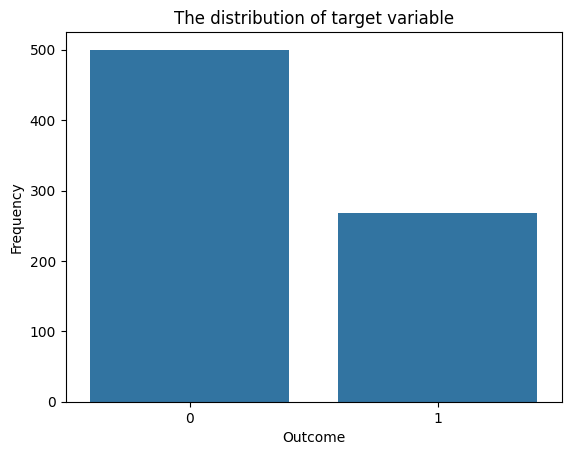

In [10]:
sns.countplot(x="Outcome", data=df )
plt.title("The distribution of target variable")
plt.xlabel("Outcome")
plt.ylabel("Frequency")

plt.show()

In [11]:
def cat_summary(dataframe,col_name,plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
cat_summary(df,"Outcome")

         Outcome      Ratio
Outcome                    
0            500  65.104167
1            268  34.895833
##########################################


count    768.000000
mean       3.845052
std        3.369578
min        0.000000
5%         0.000000
10%        0.000000
20%        1.000000
30%        1.000000
40%        2.000000
50%        3.000000
60%        4.000000
70%        5.000000
80%        7.000000
90%        9.000000
95%       10.000000
99%       13.000000
max       17.000000
Name: Pregnancies, dtype: float64


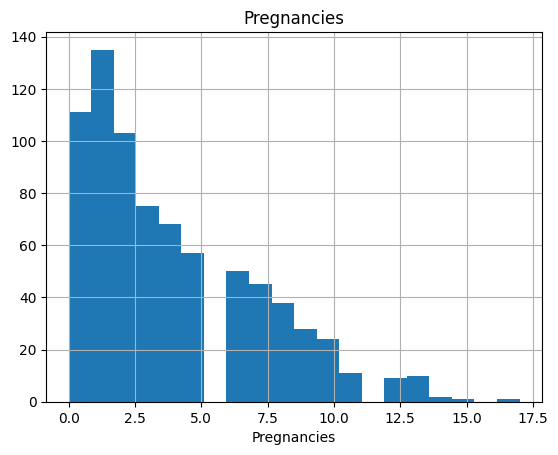

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
5%        79.000000
10%       85.000000
20%       95.000000
30%      102.000000
40%      109.000000
50%      117.000000
60%      125.000000
70%      134.000000
80%      147.000000
90%      167.000000
95%      181.000000
99%      196.000000
max      199.000000
Name: Glucose, dtype: float64


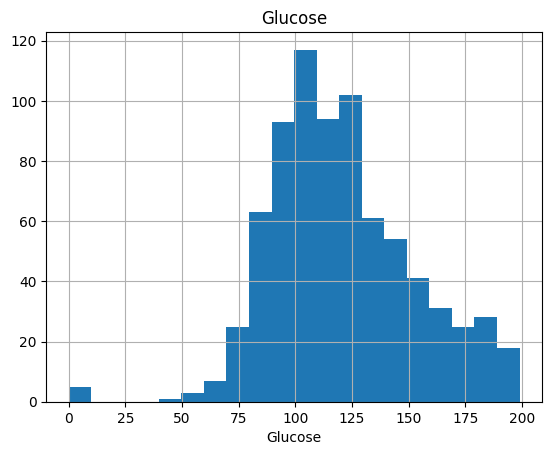

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
5%        38.700000
10%       54.000000
20%       60.000000
30%       64.000000
40%       68.000000
50%       72.000000
60%       74.000000
70%       78.000000
80%       82.000000
90%       88.000000
95%       90.000000
99%      106.000000
max      122.000000
Name: BloodPressure, dtype: float64


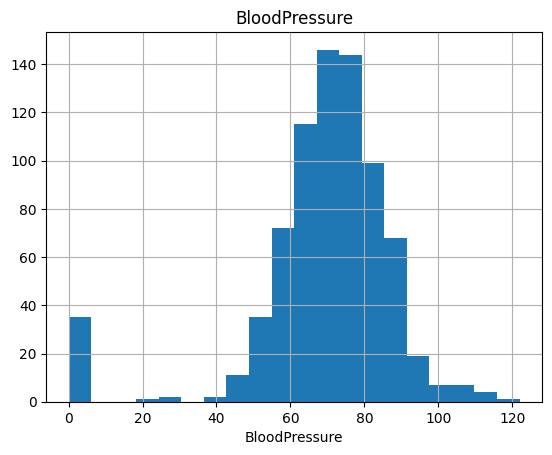

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        8.200000
40%       18.000000
50%       23.000000
60%       27.000000
70%       31.000000
80%       35.000000
90%       40.000000
95%       44.000000
99%       51.330000
max       99.000000
Name: SkinThickness, dtype: float64


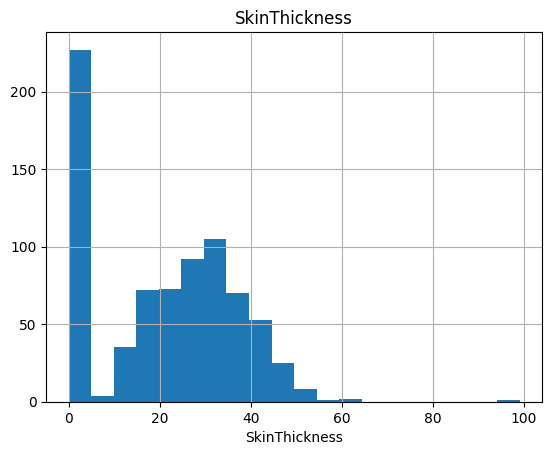

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%       30.500000
60%       72.200000
70%      106.000000
80%      150.000000
90%      210.000000
95%      293.000000
99%      519.900000
max      846.000000
Name: Insulin, dtype: float64


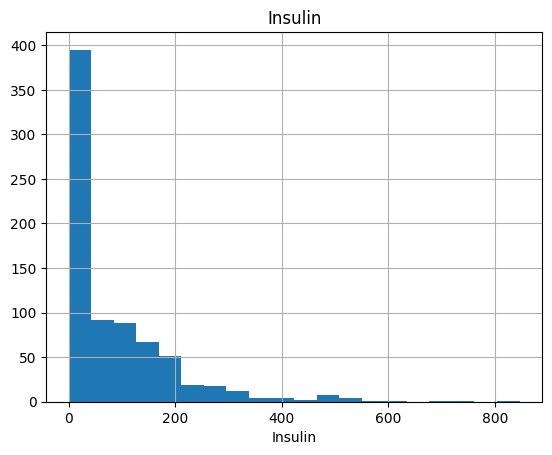

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
5%        21.800000
10%       23.600000
20%       25.900000
30%       28.200000
40%       30.100000
50%       32.000000
60%       33.700000
70%       35.490000
80%       37.800000
90%       41.500000
95%       44.395000
99%       50.759000
max       67.100000
Name: BMI, dtype: float64


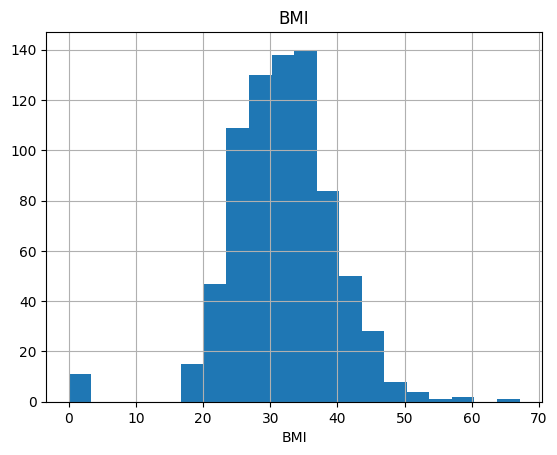

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
5%         0.140350
10%        0.165000
20%        0.219400
30%        0.259000
40%        0.302800
50%        0.372500
60%        0.454200
70%        0.563700
80%        0.687000
90%        0.878600
95%        1.132850
99%        1.698330
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64


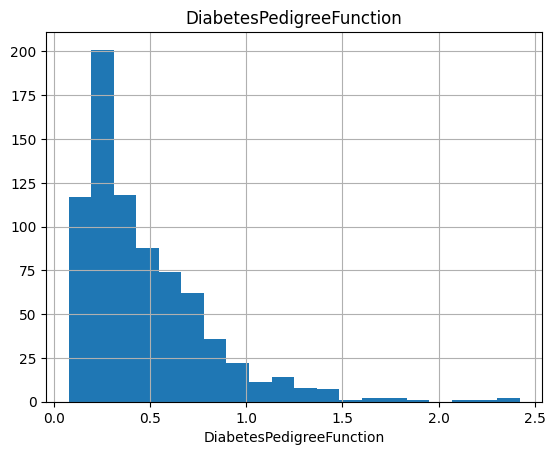

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
5%        21.000000
10%       22.000000
20%       23.000000
30%       25.000000
40%       27.000000
50%       29.000000
60%       33.000000
70%       38.000000
80%       42.600000
90%       51.000000
95%       58.000000
99%       67.000000
max       81.000000
Name: Age, dtype: float64


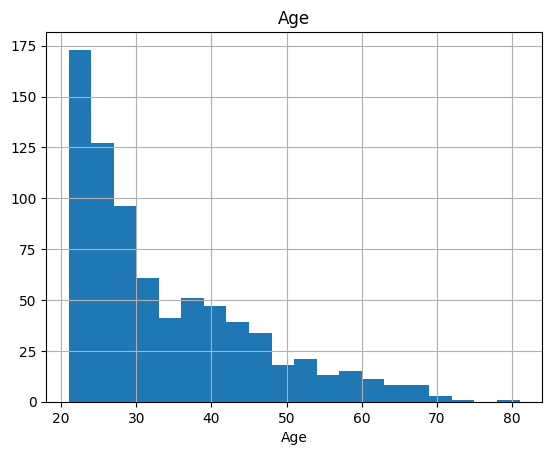

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        1.000000
80%        1.000000
90%        1.000000
95%        1.000000
99%        1.000000
max        1.000000
Name: Outcome, dtype: float64


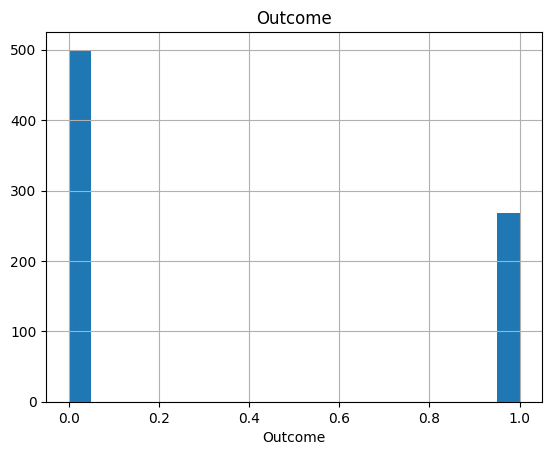

In [12]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)



In [13]:
def target_summary_with_num(dataframe,target,numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")
for col in num_cols:
    target_summary_with_num(df, "Outcome", col)


         Pregnancies
Outcome             
0           3.298000
1           4.865672


            Glucose
Outcome            
0        109.980000
1        141.257463


         BloodPressure
Outcome               
0            68.184000
1            70.824627


         SkinThickness
Outcome               
0            19.664000
1            22.164179


            Insulin
Outcome            
0         68.792000
1        100.335821


               BMI
Outcome           
0        30.304200
1        35.142537


         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500


               Age
Outcome           
0        31.190000
1        37.067164


         Outcome
Outcome         
0            0.0
1            1.0




In [14]:
def outlier_threshholds(dataframe,col_name,q1=0.25,q3=0.75):
    quantile1=dataframe[col_name].quantile(q1)
    quantile3=dataframe[col_name].quantile(q3)
    iqr=quantile3-quantile1
    upl=quantile3+iqr*1.5
    lwl=quantile1-iqr*1.5
    return upl,lwl


In [15]:
def check_outlier(dataframe,col_name):
    upl,lwl=outlier_threshholds(dataframe,col_name)
    if dataframe[(dataframe[col_name] > upl) | (dataframe[col_name] < lwl)].any(axis=None):
        return True
    else:
        return False
for col in num_cols:
  print(col,check_outlier(df,col))


Pregnancies True
Glucose True
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True
Outcome False


In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

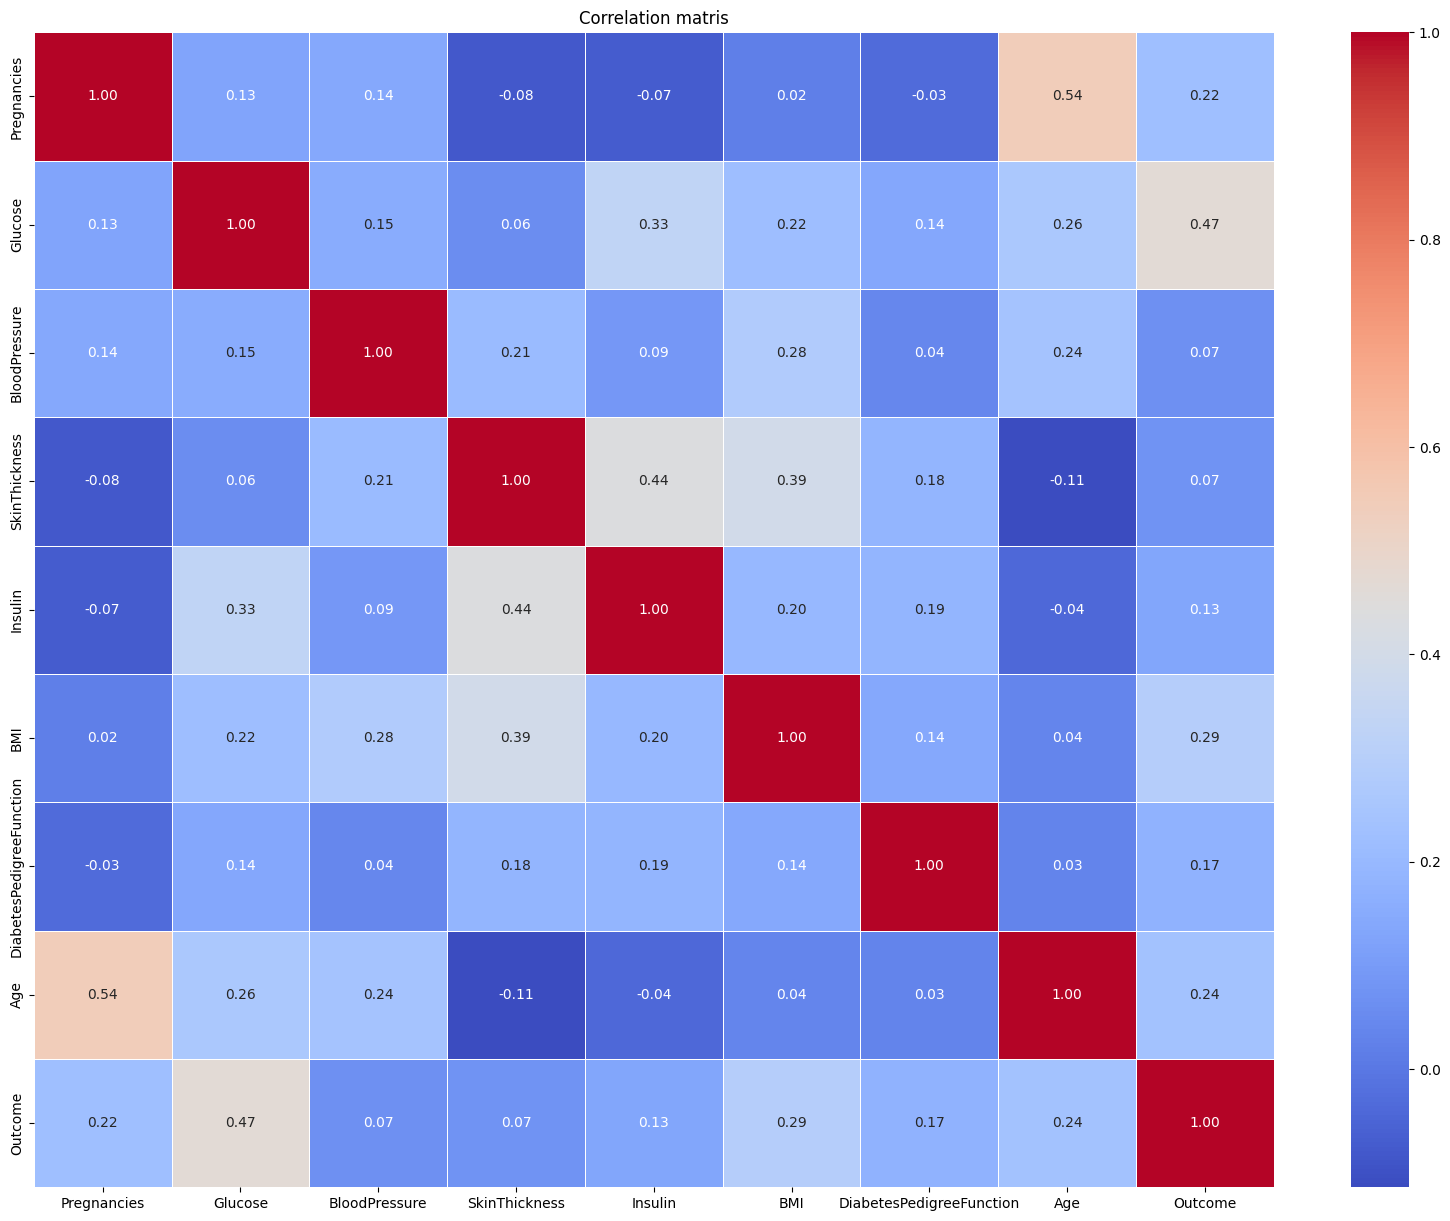

In [17]:
numeric_df = df.select_dtypes(include=["int64", "int32", "float64"])

plt.figure(figsize=(20,15))
corr_matrix=numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",
            fmt=".2f",linewidths=0.5)
plt.title("Correlation matris")
plt.show()

In [18]:
cols_to_fix = ["BMI", "Glucose", "BloodPressure", "SkinThickness", "Insulin"]
df[cols_to_fix] = df[cols_to_fix].replace(0,np.nan)


In [19]:
df
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
df_median = df.copy()
for col in cols_to_fix:
  median_value = df[col].median()
  df_median[col].fillna(median_value, inplace=True)
  print(f"Column {col} was filled with {median_value:.2f} ")
  print(f"{df_median[col].isnull().sum()} missing values remain")

Column BMI was filled with 32.30 
0 missing values remain
Column Glucose was filled with 117.00 
0 missing values remain
Column BloodPressure was filled with 72.00 
0 missing values remain
Column SkinThickness was filled with 29.00 
0 missing values remain
Column Insulin was filled with 125.00 
0 missing values remain


C:\Users\Gargi Sharma\AppData\Local\Temp\ipykernel_19360\256484987.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median[col].fillna(median_value, inplace=True)
C:\Users\Gargi Sharma\AppData\Local\Temp\ipykernel_19360\256484987.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [21]:
df_median.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
def replace_with_thresholds(dataframe,col):
    upl,lwl=outlier_threshholds(dataframe,col)
    dataframe.loc[(dataframe[col] < lwl), col] = lwl
    dataframe.loc[(dataframe[col] > upl), col] = upl

for col in num_cols:
  print(col, check_outlier(df,col))

for col in num_cols:
  replace_with_thresholds(df,col)

for col in num_cols:
  print(col, check_outlier(df,col))

Pregnancies True
Glucose False
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True
Outcome False
Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


C:\Users\Gargi Sharma\AppData\Local\Temp\ipykernel_19360\2837281313.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[col] < lwl), col] = lwl
C:\Users\Gargi Sharma\AppData\Local\Temp\ipykernel_19360\2837281313.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[col] < lwl), col] = lwl
C:\Users\Gargi Sharma\AppData\Local\Temp\ipykernel_19360\2837281313.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  datafram

In [23]:
df.loc[(df["Age"] >= 21) & (df["Age"] < 50), "NEW_AGE_CAT"] = "mature"
df.loc[(df["Age"] >= 50), "NEW_AGE_CAT"] = "senior"

df["NEW_BMI"] = pd.cut(x=df["BMI"], bins=[0, 18.5, 24.9, 29.9, 100], labels=["Underweight", "Normal", "Prediabetes", "Diabetes"])
df["NEW_GLUCOSE"] = pd.cut(x=df["Glucose"], bins=[0, 140, 200, 300], labels=["Normal", "Prediabetes", "Diabetes"])

In [24]:
df.loc[(df["BMI"] < 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "underweightmature"
df.loc[(df["BMI"] < 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "underweightsenior"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "healthymature"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "healthysenior"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "overweightmature"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "overweightsenior"
df.loc[(df["BMI"] > 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "obesemature"
df.loc[(df["BMI"] > 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "obesesenior"


In [25]:
#Creating a categorical variable by combining Age and Glucose levels.
df.loc[(df["Glucose"] < 70) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "lowmature"
df.loc[(df["Glucose"] < 70) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "lowsenior"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "normalmature"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "normalsenior"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "hiddenmature"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "hiddensenior"
df.loc[(df["Glucose"] > 125) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "highmature"
df.loc[(df["Glucose"] > 125) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "highsenior"


In [26]:
def set_insulin(dataframe, col_name="Insulin"):
    if 16 <= dataframe[col_name] <= 166:
        return "Normal"
    else:
        return "Abnormal"

df["NEW_INSULIN_SCORE"] = df.apply(set_insulin, axis=1)

df["NEW_GLUCOSE*INSULIN"] = df["Glucose"] * df["Insulin"]

df["NEW_GLUCOSE*PREGNANCIES"] = df["Glucose"] * df["Pregnancies"]

In [27]:
df.columns = [col.upper() for col in df.columns]
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1.0,senior,Diabetes,Prediabetes,obesesenior,highsenior,Abnormal,NaN,888.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0,mature,Prediabetes,Normal,obesemature,normalmature,Abnormal,NaN,85.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0,mature,Normal,Prediabetes,obesemature,highmature,Abnormal,NaN,1464.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,mature,Prediabetes,Normal,obesemature,normalmature,Normal,8366.0,89.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0,mature,Diabetes,Normal,obesemature,highmature,Abnormal,23016.0,0.0


In [28]:
cat_cols,num_cols, cat_but_car = grab_col_names(df)


Observations: 768
Variables: 17
cat_cols: 7
num_cols: 13
num_but_cat: 3
cat_but_car: 0


In [29]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

for col in binary_cols:
    df = label_encoder(df, col)
    

In [30]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["OUTCOME"]]
cat_cols

['NEW_AGE_BMI_NOM', 'NEW_AGE_GLUCOSE_NOM', 'NEW_BMI', 'NEW_GLUCOSE']

In [31]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe=pd.get_dummies(dataframe,columns=categorical_cols,drop_first=drop_first)
    return dataframe

In [32]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,...,NEW_AGE_GLUCOSE_NOM_highsenior,NEW_AGE_GLUCOSE_NOM_lowmature,NEW_AGE_GLUCOSE_NOM_lowsenior,NEW_AGE_GLUCOSE_NOM_normalmature,NEW_AGE_GLUCOSE_NOM_normalsenior,NEW_BMI_Normal,NEW_BMI_Prediabetes,NEW_BMI_Diabetes,NEW_GLUCOSE_Prediabetes,NEW_GLUCOSE_Diabetes
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1.0,1,...,True,False,False,False,False,False,False,True,True,False
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0,0,...,False,False,False,True,False,False,True,False,False,False
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0,0,...,False,False,False,False,False,True,False,False,True,False
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0,...,False,False,False,True,False,False,True,False,False,False
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0,0,...,False,False,False,False,False,False,False,True,False,False


In [33]:
#Updating the num_col list
num_cols = [col for col in num_cols if col in df.columns]

In [34]:
#Standardization
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE',
 'OUTCOME',
 'NEW_GLUCOSE*INSULIN',
 'NEW_GLUCOSE*PREGNANCIES']

In [35]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()
df.shape

(768, 27)

In [36]:
df["OUTCOME"]= df["OUTCOME"].astype("int")

In [37]:
y = df["OUTCOME"]
x = df.drop("OUTCOME", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

rf = RandomForestClassifier(n_estimators=200, max_depth=8, class_weight='balanced', random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 2)}")
print(f"Recall: {round(recall_score(y_test,y_pred), 3)}")
print(f"Precision: {round(precision_score(y_test, y_pred), 2)}")
print(f"F1: {round(f1_score(y_test, y_pred), 2)}")
print(f"Auc: {round(roc_auc_score(y_test, y_pred), 2)}")

Accuracy: 0.75
Recall: 0.685
Precision: 0.64
F1: 0.66
Auc: 0.74


In [39]:
preprocess_dict = {
    'scaler': scaler,            # if you used StandardScaler / MinMaxScaler
    'model': rf
}

with open('diabetes_model.pkl', 'wb') as f:
    p.dump(preprocess_dict, f)

In [40]:
print("Final features used for training:")
print(x_train.columns.tolist())          # or list(X.columns) after all transformations
# Example output might be:
# ['Pregnancies', 'Glucose', 'BMI', 'Age', 'Glucose^2', 'BMI_Glucose', 'Age_group_Young', ...]

Final features used for training:
['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN', 'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE', 'NEW_AGE_CAT', 'NEW_INSULIN_SCORE', 'NEW_GLUCOSE*INSULIN', 'NEW_GLUCOSE*PREGNANCIES', 'NEW_AGE_BMI_NOM_obesesenior', 'NEW_AGE_BMI_NOM_underweightmature', 'NEW_AGE_GLUCOSE_NOM_hiddensenior', 'NEW_AGE_GLUCOSE_NOM_highmature', 'NEW_AGE_GLUCOSE_NOM_highsenior', 'NEW_AGE_GLUCOSE_NOM_lowmature', 'NEW_AGE_GLUCOSE_NOM_lowsenior', 'NEW_AGE_GLUCOSE_NOM_normalmature', 'NEW_AGE_GLUCOSE_NOM_normalsenior', 'NEW_BMI_Normal', 'NEW_BMI_Prediabetes', 'NEW_BMI_Diabetes', 'NEW_GLUCOSE_Prediabetes', 'NEW_GLUCOSE_Diabetes']
